In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [2]:
X, y = [], []
path = "data/"
y_init = 0
for folder in os.listdir(path):
    sub_path = path + "/" + folder
    for img in os.listdir(sub_path):
        image_path = sub_path + "/" + img
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr,(224,224))
        X.append(img_arr)
        y.append(y_init)
    y_init += 1

In [3]:
X= np.array(X)

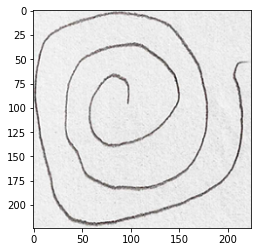

In [4]:
single_image = X[0]
plt.imshow(single_image)

In [5]:
y_cat = to_categorical(y)

In [6]:
X = X/255

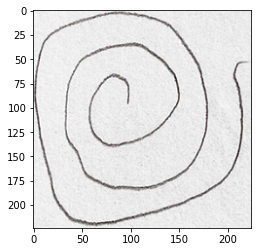

In [7]:
single_image = X[0]
plt.imshow(single_image)

In [8]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(8, 8)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2986048   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,991,042
Trainable params: 2,991,042
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X, y_cat, epochs = 30)

Train on 172 samples
Epoch 1/30
172/172 [==============================] - 5s 27ms/sample - loss: 3.9824 - accuracy: 0.5930
Epoch 2/30
172/172 [==============================] - 4s 23ms/sample - loss: 0.7116 - accuracy: 0.4709
Epoch 3/30
172/172 [==============================] - 4s 23ms/sample - loss: 0.6912 - accuracy: 0.5407
Epoch 4/30
172/172 [==============================] - 4s 23ms/sample - loss: 0.6834 - accuracy: 0.6279
Epoch 5/30
172/172 [==============================] - 4s 23ms/sample - loss: 0.6741 - accuracy: 0.6512
Epoch 6/30
172/172 [==============================] - 4s 22ms/sample - loss: 0.6610 - accuracy: 0.6860
Epoch 7/30
172/172 [==============================] - 4s 23ms/sample - loss: 0.6411 - accuracy: 0.8140
Epoch 8/30
172/172 [==============================] - 4s 22ms/sample - loss: 0.6206 - accuracy: 0.6395
Epoch 9/30
172/172 [==============================] - 4s 23ms/sample - loss: 0.6392 - accuracy: 0.5988
Epoch 10/30
172/172 [==============================]

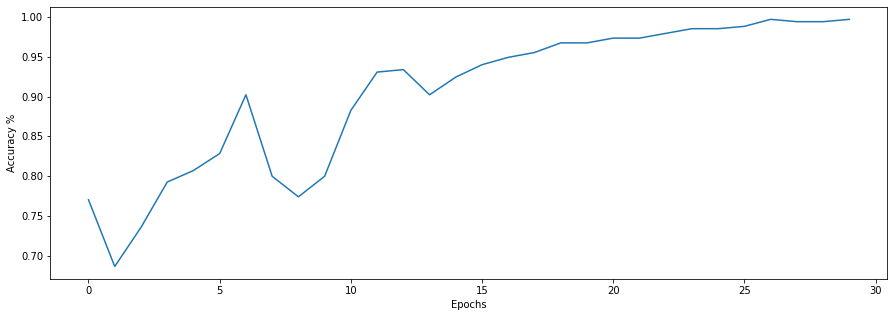

In [12]:
plt.figure(figsize = (15,5))
plt.plot(np.sqrt(history.history['accuracy']))
plt.xlabel("Epochs")
plt.ylabel('Accuracy %')
plt.show()

In [13]:
y_pred = model.predict_classes(X)

In [14]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        86

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



In [15]:
model.save('model.h5')